# More on Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

In this lab you will: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values 

## Load the data

To start, load the dataset `'titanic.csv'` using pandas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Your code here
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print(df.head())


   PassengerId  Survived Pclass  \
0          1.0       0.0      3   
1          2.0       1.0      1   
2          3.0       1.0      3   
3          4.0       1.0      1   
4          5.0       0.0      3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen, Miss. Laina  female  26.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen, Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN        S  
1    0.0          PC 17599  71.2833   C85        C  
2    0.0  STON/O2. 3101282   7.9250   NaN        S  
3    0.0            113803  53.1000  C123        S  
4    0.0            373450   8.0500   NaN        S  


Use the `.info()` method to quickly preview which features have missing data

In [4]:
# Your code here
# Get an overview of the dataset including null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1391 non-null   float64
 1   Survived     1391 non-null   float64
 2   Pclass       1391 non-null   object 
 3   Name         1391 non-null   object 
 4   Sex          1391 non-null   object 
 5   Age          1209 non-null   float64
 6   SibSp        1391 non-null   float64
 7   Parch        1391 non-null   float64
 8   Ticket       1391 non-null   object 
 9   Fare         1391 non-null   float64
 10  Cabin        602 non-null    object 
 11  Embarked     1289 non-null   object 
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


## Observe previous measures of centrality

Let's look at the `'Age'` feature. Calculate the mean, median, and standard deviation of this feature. Then plot a histogram of the distribution.

Mean Age: 29.73
Median Age: 27.00
Standard Deviation of Age: 16.07


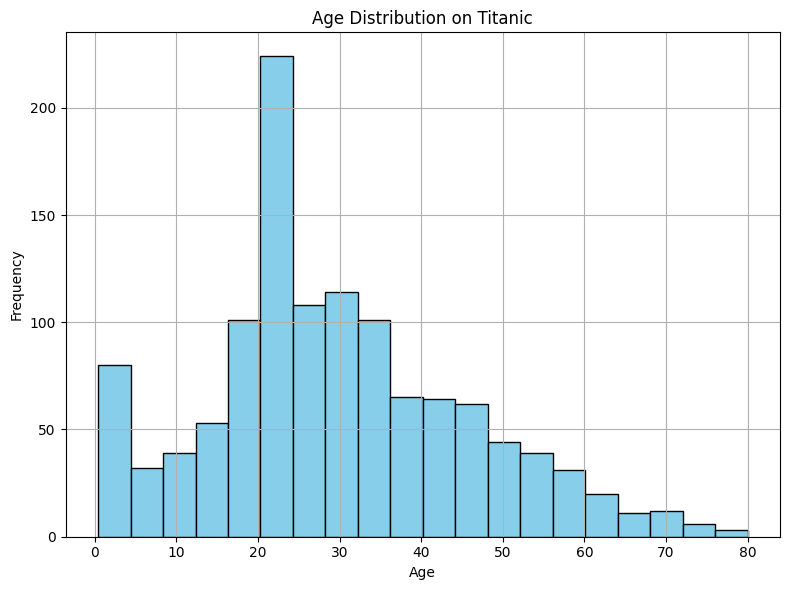

In [7]:
# Your code here
# Calculate mean, median, and standard deviation for the 'Age' column
mean_age = df['Age'].mean()
median_age = df['Age'].median()
std_age = df['Age'].std()

# Print values formatted to 2 decimal places
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Standard Deviation of Age: {std_age:.2f}")

# Plot the histogram of the 'Age' feature
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution on Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


## Impute missing values using the mean 

Fill the missing `'Age'` values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

Mean Age (Imputed): 29.73
Median Age (Imputed): 29.73
Standard Deviation of Age (Imputed): 14.98


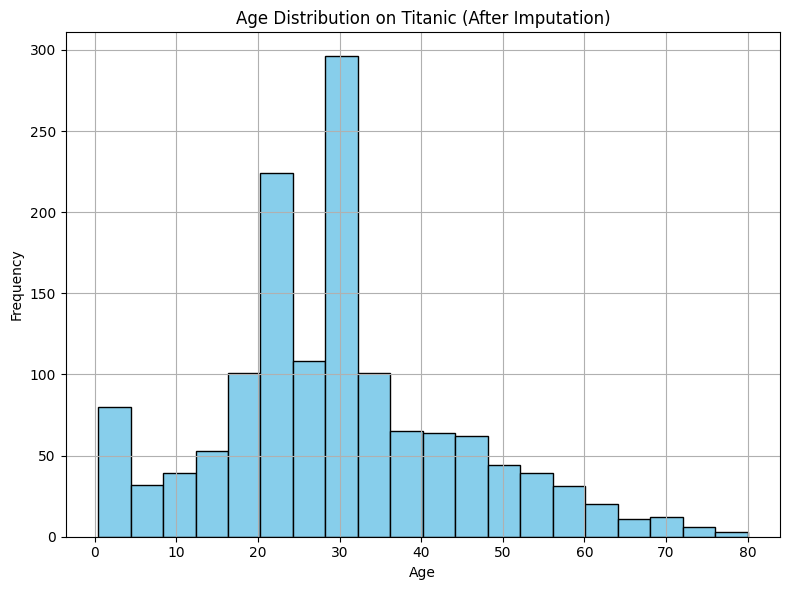

In [10]:
# Your code here
# Create a copy of the original dataframe to avoid overwriting
df_imputed = df.copy()

# Fill the missing 'Age' values with the mean age
mean_age_imputed = df_imputed['Age'].mean()
df_imputed['Age'] = df_imputed['Age'].fillna(mean_age_imputed)

# Recalculate mean, median, and standard deviation for the imputed 'Age' column
mean_age_imputed = df_imputed['Age'].mean()
median_age_imputed = df_imputed['Age'].median()
std_age_imputed = df_imputed['Age'].std()

# Print the results formatted to 2 decimal places
print(f"Mean Age (Imputed): {mean_age_imputed:.2f}")
print(f"Median Age (Imputed): {median_age_imputed:.2f}")
print(f"Standard Deviation of Age (Imputed): {std_age_imputed:.2f}")

# Plot the histogram of the 'Age' feature after imputing missing values
plt.figure(figsize=(8, 6))
plt.hist(df_imputed['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution on Titanic (After Imputation)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()



### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute missing values using the median 

Fill the missing `'Age'` values, this time using the median age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

Mean Age (Imputed with Median): 29.37
Median Age (Imputed with Median): 27.00
Standard Deviation of Age (Imputed with Median): 15.01


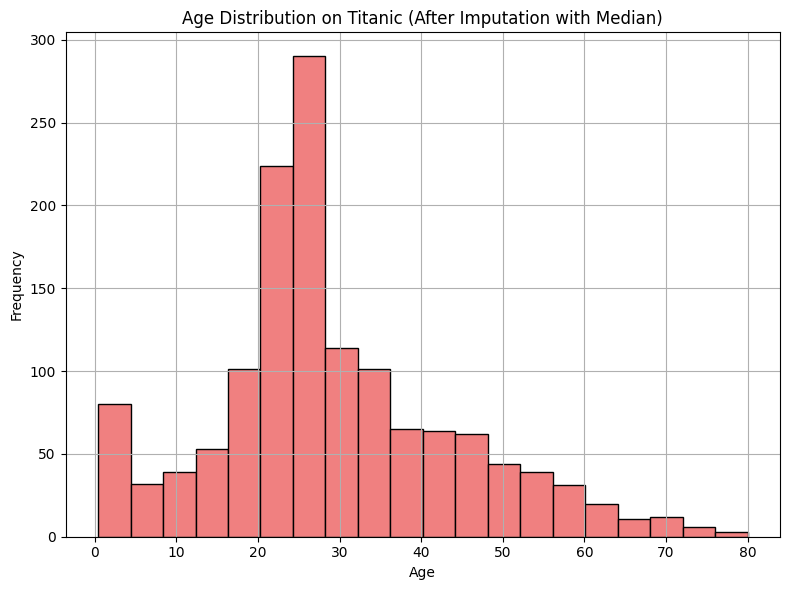

In [13]:
# Your code here
# Create a copy of the original dataframe to avoid overwriting
df_imputed_median = df.copy()

# Calculate the median of the 'Age' column
median_age = df_imputed_median['Age'].median()

# Fill the missing 'Age' values with the median age
df_imputed_median['Age'] = df_imputed_median['Age'].fillna(median_age)

# Recalculate mean, median, and standard deviation for the 'Age' column after imputation
mean_age_median_imputed = df_imputed_median['Age'].mean()
median_age_median_imputed = df_imputed_median['Age'].median()
std_age_median_imputed = df_imputed_median['Age'].std()

# Print the results formatted to 2 decimal places
print(f"Mean Age (Imputed with Median): {mean_age_median_imputed:.2f}")
print(f"Median Age (Imputed with Median): {median_age_median_imputed:.2f}")
print(f"Standard Deviation of Age (Imputed with Median): {std_age_median_imputed:.2f}")

# Plot the histogram of the 'Age' feature after imputing missing values with the median
plt.figure(figsize=(8, 6))
plt.hist(df_imputed_median['Age'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Age Distribution on Titanic (After Imputation with Median)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

Mean Age (After Dropping Rows): 29.73
Median Age (After Dropping Rows): 27.00
Standard Deviation of Age (After Dropping Rows): 16.07


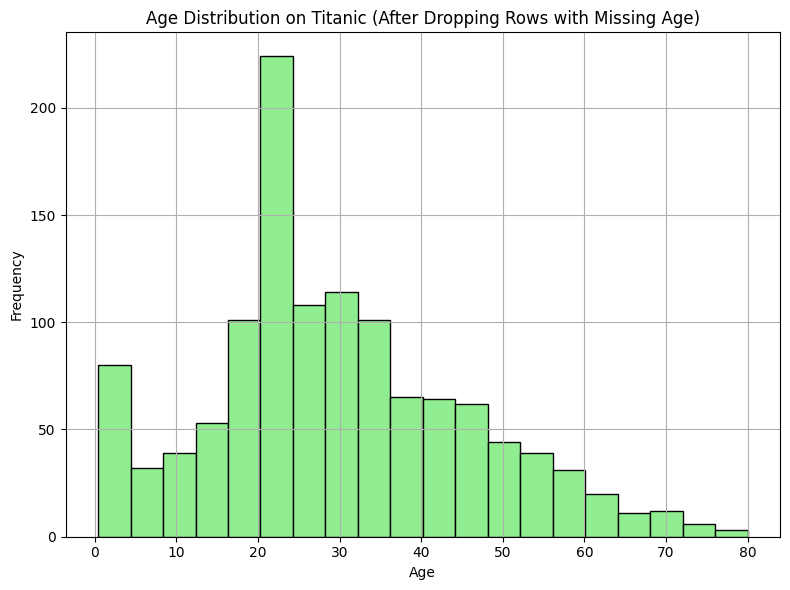

In [16]:
# Your code here
# Create a copy of the original dataframe to avoid overwriting
df_dropped = df.copy()

# Drop rows where the 'Age' column has missing values
df_dropped = df_dropped.dropna(subset=['Age'])

# Recalculate mean, median, and standard deviation for the 'Age' column after dropping missing values
mean_age_dropped = df_dropped['Age'].mean()
median_age_dropped = df_dropped['Age'].median()
std_age_dropped = df_dropped['Age'].std()

# Print the results formatted to 2 decimal places
print(f"Mean Age (After Dropping Rows): {mean_age_dropped:.2f}")
print(f"Median Age (After Dropping Rows): {median_age_dropped:.2f}")
print(f"Standard Deviation of Age (After Dropping Rows): {std_age_dropped:.2f}")

# Plot the histogram of the 'Age' feature after dropping rows with missing values
plt.figure(figsize=(8, 6))
plt.hist(df_dropped['Age'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Age Distribution on Titanic (After Dropping Rows with Missing Age)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### Commentary

Dropping missing values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.